# Quantum Computing - Qiskit

#### Made By : Gaurav Baweja
##### Source : https://github.com/Aanvikshiki/Quantum_Computing
##### Reference: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

### Create Entangled Circuit

In [79]:
#Import Libraries
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex, plot_state_qsphere

In [80]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

In [81]:
# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

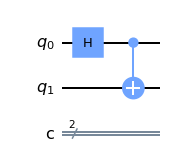

In [82]:
# Draw the circuit
circuit.draw(output='mpl')

In [83]:
# Let's get the result:
svsim=Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

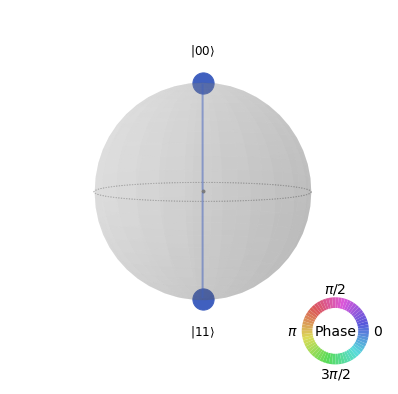

In [84]:
#Plot Sphere
plot_state_qsphere(final_state)

In [85]:
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

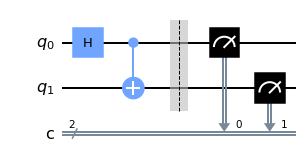

In [86]:
# Draw the circuit
circuit.draw(output='mpl')

In [90]:
# compile the circuit down to low-level QASM instructions
compiled_circuit = transpile(circuit, simulator)
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()

In [88]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 484, '00': 516}


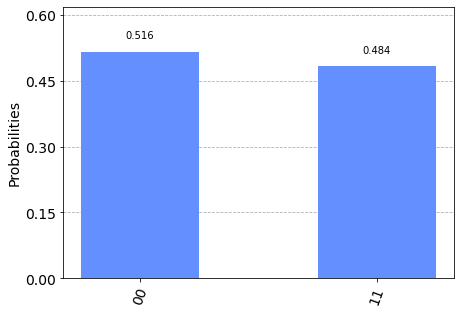

In [89]:
#Plot histogram of result
plot_histogram(counts)